<a href="https://colab.research.google.com/github/alexmjn/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module1-exploratory-data-analysis/LS_DS_112_Make_Features_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
housing_data = df[["TotalBsmtSF", '1stFlrSF', '2ndFlrSF', 'SalePrice']].copy()

In [6]:
housing_data.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice
0,856,856,854,208500
1,1262,1262,0,181500
2,920,920,866,223500
3,756,961,756,140000
4,1145,1145,1053,250000


In [8]:
# Create a "Total Square Footage" feature for future analysis

housing_data['TotalSquareFootage'] = housing_data['1stFlrSF'] + housing_data['TotalBsmtSF'] + housing_data['2ndFlrSF']
housing_data.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSquareFootage
0,856,856,854,208500,2566
1,1262,1262,0,181500,2524
2,920,920,866,223500,2706
3,756,961,756,140000,2473
4,1145,1145,1053,250000,3343


In [9]:
# Having this new feature allows us to calculate price per square foot.
housing_data["PricePerSqFt"] = housing_data["SalePrice"] / housing_data["TotalSquareFootage"]
housing_data.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSquareFootage,PricePerSqFt
0,856,856,854,208500,2566,81.254871
1,1262,1262,0,181500,2524,71.909667
2,920,920,866,223500,2706,82.594235
3,756,961,756,140000,2473,56.611403
4,1145,1145,1053,250000,3343,74.783129


In [10]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2019-12-03 21:05:34--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [                 <=>]  21.69M   883KB/s    in 25s     

2019-12-03 21:06:00 (871 KB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22744357]



In [11]:
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [12]:
!head LoanStats_2018Q4.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

In [13]:
loan_data = pd.read_csv('LoanStats_2018Q4.csv')
print(loan_data.shape)
loan_data.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,7,13,18,19,24,25,27,28,29,30,31,32,34,36,37,38,39,40,41,42,43,44,46,49,50,51,53,54,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,113,114,115,116,117,118,119,120,121,126,127,131,132,134,135,136,141,142,143) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(128415, 1)


Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
id  member_id loan_amnt funded_amnt funded_amnt_inv term       int_rate installment grade sub_grade emp_title                  emp_length home_ownership annual_inc verification_status issue_d  loan_status pymnt_plan url desc purpose            title                   zip_code addr_state dti   delinq_2yrs earliest_cr_line inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc initial_list_status out_prncp out_prncp_inv total_pymnt      total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d collections_12_mths_ex_med mths_since_last_major_derog policy_code application_type annual_inc_joint dti_joint verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_act_il open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util chargeoff_within_12_mths delinq_amnt mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit revol_bal_joint sec_app_earliest_cr_line sec_app_inq_last_6mths sec_app_mort_acc sec_app_open_acc sec_app_revol_util sec_app_open_act_il sec_app_num_rev_accts sec_app_chargeoff_within_12_mths sec_app_collections_12_mths_ex_med sec_app_mths_since_last_major_derog hardship_flag hardship_type hardship_reason hardship_status deferral_term hardship_amount hardship_start_date hardship_end_date payment_plan_start_date hardship_length hardship_dpd hardship_loan_status orig_projected_additional_accrued_interest hardship_payoff_balance_amount hardship_last_payment_amount debt_settlement_flag debt_settlement_flag_date settlement_status settlement_date settlement_amount settlement_percentage                                    settlement_term                              
NaN NaN       20000     20000       20000            36 months  14.47%  688.13      C     C2        bus driver                 4 years    OWN            52000      Source Verified     Dec-2018 Current     n          NaN NaN  debt_consolidation Debt consolidation      681xx    NE         30.65 1           Jun-1979         2              15                     NaN                    6        0       15048     73%        22        w                   14777.99  14777.99      7481.0           7481.00         5222.01         2258.99       0.0                0.0        0.0                     Nov-2019     688.13          Dec-2019     Nov-2019           0                          NaN                         1           Individual       NaN              NaN       NaN                       0              0            33157       0           2           1           1           8                  18109        44      1           2           8628       73       20700            1      1           4            3                    5526        5175           73      0                        0           141                474                  10                    8              0        10                   15                       1                     15                             0                     4              4               11          12        8         4             14            4                   6        NaN              0            0                  2                  95        

In [20]:
# There are extra rows at the top and bottom of our data set that are causing import problems.
# Let's re-import the data with a few additional arguments to help Pandas parse the data.

loan_data = pd.read_csv('LoanStats_2018Q4.csv', header = 1, skipfooter = 2)
print(loan_data.shape)
loan_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


(128412, 144)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,20000,20000,20000.0,36 months,14.47%,688.13,C,C2,bus driver,4 years,OWN,52000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,681xx,NE,30.65,1,Jun-1979,2,15.0,NaN,6,0,15048,73%,22,w,14777.99,14777.99,7481.000000,7481.00,...,50.0,0,0,61699,33157,20700,40999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,25000,25000,25000.0,60 months,16.14%,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,703xx,LA,37.09,0,Sep-2003,0,NaN,NaN,7,0,8901,36.8%,21,w,0.00,0.00,26653.167580,26653.17,...,33.3,0,0,73683,49524,18600,49483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,26500,26500,26500.0,60 months,11.31%,580.28,B,B3,Compliance Director,10+ years,MORTGAGE,134000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,747xx,OK,18.91,0,Dec-2006,2,NaN,NaN,17,0,43640,65.4%,37,w,23051.06,23051.06,5777.820000,5777.82,...,66.7,0,0,430403,107975,49300,88875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10400,10400,10400.0,36 months,12.98%,350.32,B,B5,Program Support Assistant,10+ years,MORTGAGE,56099.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,800xx,CO,20.92,0,Jul-2013,2,32.0,67.0,8,1,1669,9.8%,10,w,7902.57,7902.57,3491.950000,3491.95,...,0.0,1,0,60709,39564,17000,43709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,35000,35000,35000.0,60 months,12.98%,796.00,B,B5,Sr. Vice President -Risk Manager,7 years,MORTGAGE,211646.0,Source Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,797xx,TX,15.09,0,Sep-1985,0,77.0,NaN,13,0,55944,74.9%,39,w,0.00,0.00,36266.741552,36266.74,...,66.7,0,0,516204,82514,59700,51904,88364.0,Sep-1985,0.0,6.0,19.0,53.4,2.0,29.0,0.0,0.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Let's verify that those extra rows of NaN values are gone.
pd.set_option("display.max_rows", 100)
loan_data.isnull().sum().sort_values()

inq_fi                                             0
delinq_amnt                                        0
chargeoff_within_12_mths                           0
acc_open_past_24mths                               0
inq_last_12m                                       0
                                               ...  
orig_projected_additional_accrued_interest    128249
url                                           128412
member_id                                     128412
desc                                          128412
id                                            128412
Length: 144, dtype: int64

In [23]:
loan_data.isnull().sum().sort_values(ascending = False)

id                                            128412
desc                                          128412
member_id                                     128412
url                                           128412
orig_projected_additional_accrued_interest    128249
                                               ...  
inq_last_12m                                       0
acc_open_past_24mths                               0
chargeoff_within_12_mths                           0
delinq_amnt                                        0
inq_fi                                             0
Length: 144, dtype: int64

In [0]:
# There are four columns where all values are missing. Since this, by
# definition, adds no information, let's drop those columns.

loan_data = loan_data.drop(['url', 'member_id', 'desc', 'id'], axis = 1)


In [26]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,20000,20000,20000.0,36 months,14.47%,688.13,C,C2,bus driver,4 years,OWN,52000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,681xx,NE,30.65,1,Jun-1979,2,15.0,NaN,6,0,15048,73%,22,w,14777.99,14777.99,7481.000000,7481.00,5222.01,2258.99,0.0,0.0,...,50.0,0,0,61699,33157,20700,40999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,25000,25000,25000.0,60 months,16.14%,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,703xx,LA,37.09,0,Sep-2003,0,NaN,NaN,7,0,8901,36.8%,21,w,0.00,0.00,26653.167580,26653.17,25000.00,1653.17,0.0,0.0,...,33.3,0,0,73683,49524,18600,49483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,26500,26500,26500.0,60 months,11.31%,580.28,B,B3,Compliance Director,10+ years,MORTGAGE,134000.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,747xx,OK,18.91,0,Dec-2006,2,NaN,NaN,17,0,43640,65.4%,37,w,23051.06,23051.06,5777.820000,5777.82,3448.94,2328.88,0.0,0.0,...,66.7,0,0,430403,107975,49300,88875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,10400,10400,10400.0,36 months,12.98%,350.32,B,B5,Program Support Assistant,10+ years,MORTGAGE,56099.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,800xx,CO,20.92,0,Jul-2013,2,32.0,67.0,8,1,1669,9.8%,10,w,7902.57,7902.57,3491.950000,3491.95,2497.43,994.52,0.0,0.0,...,0.0,1,0,60709,39564,17000,43709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,35000,35000,35000.0,60 months,12.98%,796.00,B,B5,Sr. Vice President -Risk Manager,7 years,MORTGAGE,211646.0,Source Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,797xx,TX,15.09,0,Sep-1985,0,77.0,NaN,13,0,55944,74.9%,39,w,0.00,0.00,36266.741552,36266.74,35000.00,1266.74,0.0,0.0,...,66.7,0,0,516204,82514,59700,51904,88364.0,Sep-1985,0.0,6.0,19.0,53.4,2.0,29.0,0.0,0.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
loan_data['int_rate']

0          14.47%
1          16.14%
2          11.31%
3          12.98%
4          12.98%
           ...   
128407     15.02%
128408     15.02%
128409     13.56%
128410     11.06%
128411     16.91%
Name: int_rate, Length: 128412, dtype: object

In [0]:
# This looks like data we might want to work with, but it's typed as an object.
# Let's try and get it into numeric form so we can use it in computations and
# models.

def clean_int_rate(cell_contents):
  clean_rate = float(cell_contents.strip().strip('%'))
  return clean_rate

In [32]:
test_int_rate = ' 13.44%'
clean_int_rate(test_int_rate)

13.44

In [33]:
loan_data['int_rate'] = loan_data['int_rate'].apply(clean_int_rate)
loan_data['int_rate']

0         14.47
1         16.14
2         11.31
3         12.98
4         12.98
          ...  
128407    15.02
128408    15.02
128409    13.56
128410    11.06
128411    16.91
Name: int_rate, Length: 128412, dtype: float64

In [0]:
# We observe that interest rate is now a float.

In [41]:
loan_data['emp_title'].value_counts(dropna=False)[:20]

NaN                   20947
Teacher                2090
Manager                1773
Registered Nurse        952
Driver                  924
RN                      726
Supervisor              697
Sales                   580
Project Manager         526
General Manager         523
Office Manager          521
Owner                   420
Director                402
Truck Driver            387
Operations Manager      387
Nurse                   326
Engineer                325
Sales Manager           304
manager                 301
Supervisor              270
Name: emp_title, dtype: int64

In [42]:
len(loan_data['emp_title'].value_counts())

43892

In [0]:
def clean_title(cell_contents):
  if isinstance(cell_contents, str):
    return cell_contents.title().strip()
  else:
    return 'Unknown'

In [0]:
loan_data['emp_title'] = loan_data['emp_title'].apply(clean_title)

In [45]:
loan_data['emp_title'].value_counts(dropna=False)[:20]

Unknown               20947
Teacher                2557
Manager                2395
Registered Nurse       1418
Driver                 1258
Supervisor             1160
Truck Driver            920
Rn                      834
Office Manager          805
Sales                   803
General Manager         791
Project Manager         720
Owner                   625
Director                523
Operations Manager      518
Sales Manager           500
Police Officer          440
Nurse                   425
Technician              420
Engineer                412
Name: emp_title, dtype: int64

In [0]:
# Maybe we want to clean the data up further by combining some categories
def combine_responses(cell_contents):
  if 'Manager' in cell_contents:
    return 'Manager'
  elif 'Nurse' in cell_contents or cell_contents == 'Rn':
    return 'Nurse'
  else:
    return cell_contents
  

In [49]:
loan_data['emp_title'] = loan_data['emp_title'].apply(combine_responses)
len(loan_data['emp_title'].value_counts())

30401

In [0]:
top_jobs = loan_data['emp_title'].value_counts()[:20]
def check_job(cell_contents, jobs_list):
  if cell_contents in jobs_list:
    return cell_contents
  else:
    return "Other"

In [55]:
loan_data['emp_title'] = loan_data['emp_title'].apply(check_job, jobs_list = top_jobs)
loan_data['emp_title'].head(20)

0        Other
1      Manager
2        Other
3        Other
4      Manager
5      Teacher
6        Other
7        Other
8      Manager
9        Other
10       Other
11       Other
12       Other
13      Driver
14       Other
15     Manager
16    Engineer
17      Driver
18     Manager
19       Other
Name: emp_title, dtype: object

In [57]:
# Looking at dates in the data frame

[col for col in loan_data if col.endswith('_d')]

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [58]:
loan_data['issue_d'][:10]

0    Dec-2018
1    Dec-2018
2    Dec-2018
3    Dec-2018
4    Dec-2018
5    Dec-2018
6    Dec-2018
7    Dec-2018
8    Dec-2018
9    Dec-2018
Name: issue_d, dtype: object

In [61]:
loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'], infer_datetime_format=True)
loan_data.dtypes[:15]

loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                datetime64[ns]
loan_status                    object
dtype: object

In [64]:
# Now that the issue year is in datetime format, we can manipulate
# it with Pandas' built-in .dt accessor.

loan_data['issue_year'] = loan_data.issue_d.dt.year
loan_data['issue_year']

0         2018
1         2018
2         2018
3         2018
4         2018
          ... 
128407    2018
128408    2018
128409    2018
128410    2018
128411    2018
Name: issue_year, Length: 128412, dtype: int64

In [0]:
loan_data['earliest_cr_line'] = pd.to_datetime(loan_data['earliest_cr_line'], infer_datetime_format=True)

In [67]:
loan_data['days_from_earliest_credit_to_issue']=(loan_data['issue_d'] - loan_data['earliest_cr_line']).dt.days

loan_data['days_from_earliest_credit_to_issue'].head()

0    14428
1     5570
2     4383
3     1979
4    12144
Name: days_from_earliest_credit_to_issue, dtype: int64

In [68]:
loan_data['days_from_earliest_credit_to_issue'].describe()

count    128412.000000
mean       5859.891490
std        2886.535578
min        1126.000000
25%        4049.000000
50%        5266.000000
75%        7244.000000
max       25171.000000
Name: days_from_earliest_credit_to_issue, dtype: float64

# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [34]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-12-03 21:22:27--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.98.181
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.98.181|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  54.3MB/s    in 3.5s    

2019-12-03 21:22:31 (55.3 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [35]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [37]:
%cd instacart_2017_05_01

[Errno 2] No such file or directory: 'instacart_2017_05_01'
/content/instacart_2017_05_01


In [38]:
!pwd

/content/instacart_2017_05_01


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

In [0]:
aisles = pd.read_csv("aisles.csv")

In [71]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [72]:
departments = pd.read_csv("departments.csv")
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [73]:
order_products_prior = pd.read_csv("order_products__prior.csv")
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [74]:
order_products_train = pd.read_csv("order_products__train.csv")
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [75]:
orders = pd.read_csv("orders.csv")
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [76]:
products = pd.read_csv("products.csv")
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [80]:
# The "orders" data frame contains the orders and marks whether items
# are in the prior, test, or training set. Let's look at those.
set_name = orders['eval_set'].value_counts()
set_name

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

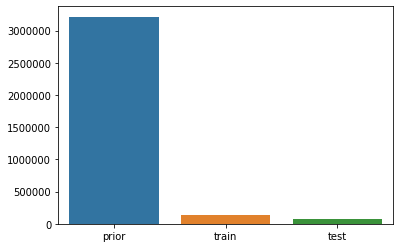

In [79]:
sns.barplot(set_name.index, set_name.values)
plt.show()

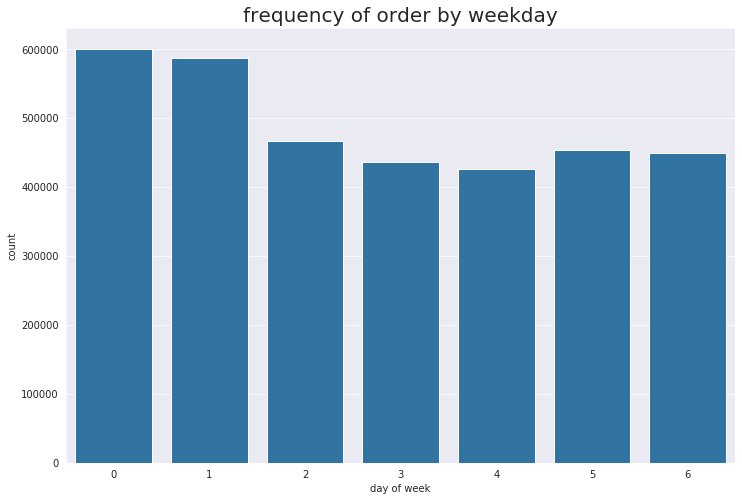

In [87]:
plt.figure(figsize = (12, 8))
sns.set_style("darkgrid")
sns.countplot(x = "order_dow", data = orders, color = color[0])
plt.xlabel('day of week')
plt.xticks()
plt.title("frequency of order by weekday", fontsize = 20);